## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



# Nova seção

In [174]:
  ### execute essa celula, mas não altere essa função.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

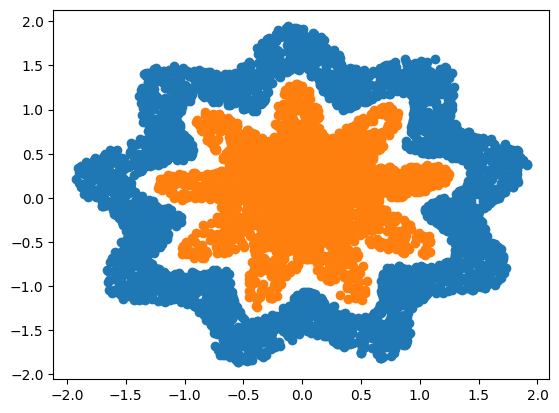

In [175]:
## coloque seu RM aqui!!
RM = [9,3,9,3,9]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Partâmetros do algoritmo de adaptação
    - Função de ativação

In [176]:
# Gerar os dados
c1, c2 = generate_data(nData, nVertices)

# Criar os rótulos correspondentes
rotulos = np.concatenate((np.zeros(nData), np.ones(nData)))

# Juntar os dados e rótulos em um único array
dados = np.concatenate((c1, c2))

In [177]:
# Dividir os dados em conjuntos de treinamento e teste
frac_treinamento = 0.8
n_treinamento = int(frac_treinamento * nData * 2)
indices_treinamento = np.random.choice(nData * 2, n_treinamento, replace=False)
indices_teste = np.setdiff1d(np.arange(nData * 2), indices_treinamento)

dados_treinamento = dados[indices_treinamento]
rotulos_treinamento = rotulos[indices_treinamento]

dados_teste = dados[indices_teste]
rotulos_teste = rotulos[indices_teste]

In [178]:
# Normalizar os dados
media = np.mean(dados_treinamento, axis=0)
desvio_padrao = np.std(dados_treinamento, axis=0)

dados_treinamento = (dados_treinamento - media) / desvio_padrao
dados_teste = (dados_teste - media) / desvio_padrao


In [179]:
# Definir o modelo
modelo = keras.Sequential([
keras.layers.Dense(16, activation='relu', input_shape=(2,)),
keras.layers.Dense(5, activation='relu'), 
keras.layers.Dense(16, activation='relu'),
keras.layers.Dense(2, activation='softmax')
])

# Compilar o modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
rotulos_treinamento = keras.utils.to_categorical(rotulos_treinamento, 2)
rotulos_teste = keras.utils.to_categorical(rotulos_teste, 2)

historico = modelo.fit(dados_treinamento, rotulos_treinamento, epochs=50, batch_size=32, validation_data=(dados_teste, rotulos_teste))

Epoch 1/50
165/165 [==============================] - 2s 6ms/step - loss: 0.5600 - accuracy: 0.7246 - val_loss: 0.4086 - val_accuracy: 0.8667
Epoch 2/50
165/165 [==============================] - 1s 4ms/step - loss: 0.2752 - accuracy: 0.9330 - val_loss: 0.1744 - val_accuracy: 0.9561
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.9714 - val_loss: 0.0976 - val_accuracy: 0.9682
Epoch 4/50
165/165 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9744 - val_loss: 0.0765 - val_accuracy: 0.9727
Epoch 5/50
165/165 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9775 - val_loss: 0.0684 - val_accuracy: 0.9742
Epoch 6/50
165/165 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9775 - val_loss: 0.0698 - val_accuracy: 0.9735
Epoch 7/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9778 - val_loss: 0.0620 - val_accuracy: 0.9780
Epoch 

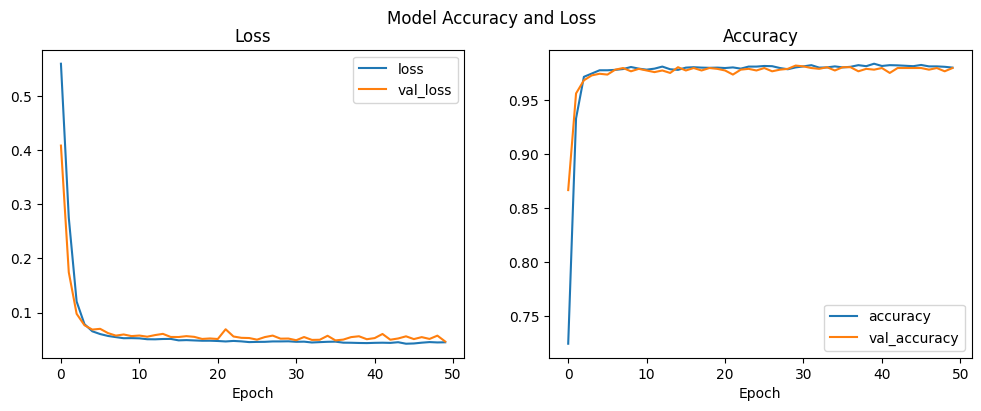

In [180]:
history = pd.DataFrame(historico.history)
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 4))

fig.suptitle('Model Accuracy and Loss')

ax.set_title('Loss')
ax.set_xlabel('Epoch')

ax.plot(history['loss'], label='loss')
ax.plot(history['val_loss'], label='val_loss')
ax.legend()

ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')

ax2.plot(history['accuracy'], label='accuracy')
ax2.plot(history['val_accuracy'], label='val_accuracy')
ax2.legend()

plt.show()

In [181]:
# Avaliar a precisão do modelo no conjunto de teste
precisao_teste = modelo.evaluate(dados_teste, rotulos_teste)[1]
print(f"Precisão no conjunto de teste: {precisao_teste}")

42/42 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9795
Precisão no conjunto de teste: 0.9795454740524292


In [182]:
# Avalie o modelo no conjunto de teste
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1))
precision = precision_score(y_test, np.argmax(y_pred, axis=1))
recall = recall_score(y_test, np.argmax(y_pred, axis=1))
f1 = f1_score(y_test, np.argmax(y_pred, axis=1))

# Exiba os resultados
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)


42/42 [==============================] - 0s 2ms/step
Acurácia: 0.978030303030303
Precisão: 0.9953416149068323
Revocação: 0.9610194902548725
F1-Score: 0.9778794813119756
